In [6]:
from torch.utils.data import DataLoader
import sys
sys.path.append('/home/mei/nas/docker/thesis/model_train')
from dataloader.ts_reader import MultiModalDataset,VitalSignsDataset,vital_pre_train
from model.tdpsom import TemporalDPSOM
from model.tdpsom_loss import *
import seaborn as sns
import gc

gc.collect()
import numpy as np

import torch
torch.cuda.empty_cache()

In [5]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/hdf/train/ts_each_patient.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/hdf/val/ts_each_patient.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/hdf/test/ts_each_patient.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [4]:
from torch.utils.data import DataLoader, TensorDataset

small_data_iter = iter(train_loader) 
inputs, lengths = next(small_data_iter)  

small_dataset = TensorDataset(inputs, lengths)
small_train_loader = DataLoader(small_dataset, batch_size=len(inputs), shuffle=True) 

In [3]:
input_dim = 154         
hidden_dim =128
latent_dim = 100
grid_size = (10, 10) 
num_nodes = grid_size[0] * grid_size[1]
lstm_hidden_dim = 128
batch_size = 16
T = 5000

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")   
model = TemporalDPSOM(input_dim, hidden_dim, latent_dim, num_nodes, grid_size, lstm_hidden_dim)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 200


In [7]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/tdpsom.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/history_tdpsom.json'

model, history =train_tdpsom_model(model, train_loader, val_loader, device, num_epochs, optimizer,save_path, history_path,
                       kl_weight=1.0, cluster_weight=1.0, smooth_weight=1.0, pred_weight=1.0)

Epoch [1/200], Train Loss: 1.4012, Val Loss: 1.3947
Epoch [11/200], Train Loss: 1.4016, Val Loss: 1.3717
Epoch [21/200], Train Loss: 1.3983, Val Loss: 1.3701
Epoch [31/200], Train Loss: 1.3934, Val Loss: 1.3740
Epoch [41/200], Train Loss: 1.3875, Val Loss: 1.3662
Epoch [51/200], Train Loss: 1.3943, Val Loss: 1.3658
Epoch [61/200], Train Loss: 1.3921, Val Loss: 1.3660
Epoch [71/200], Train Loss: 1.3852, Val Loss: 1.3677
Epoch [81/200], Train Loss: 1.3924, Val Loss: 1.3653
Epoch [91/200], Train Loss: 1.3846, Val Loss: 1.3662
Epoch [101/200], Train Loss: 1.3870, Val Loss: 1.3657
Epoch [111/200], Train Loss: 1.3888, Val Loss: 1.3660
Epoch [121/200], Train Loss: 1.3881, Val Loss: 1.3656
Epoch [131/200], Train Loss: 1.3933, Val Loss: 1.3669
Epoch [141/200], Train Loss: 1.3813, Val Loss: 1.3659
Epoch [151/200], Train Loss: 1.3894, Val Loss: 1.3652
Epoch [161/200], Train Loss: 1.3933, Val Loss: 1.3665
Epoch [171/200], Train Loss: 1.3838, Val Loss: 1.3659
Epoch [181/200], Train Loss: 1.3922, Va

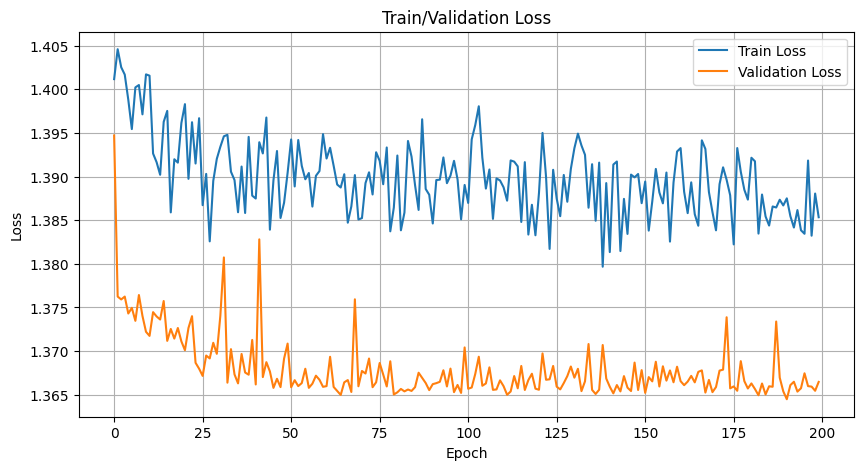

In [8]:
plot_training_history(history)

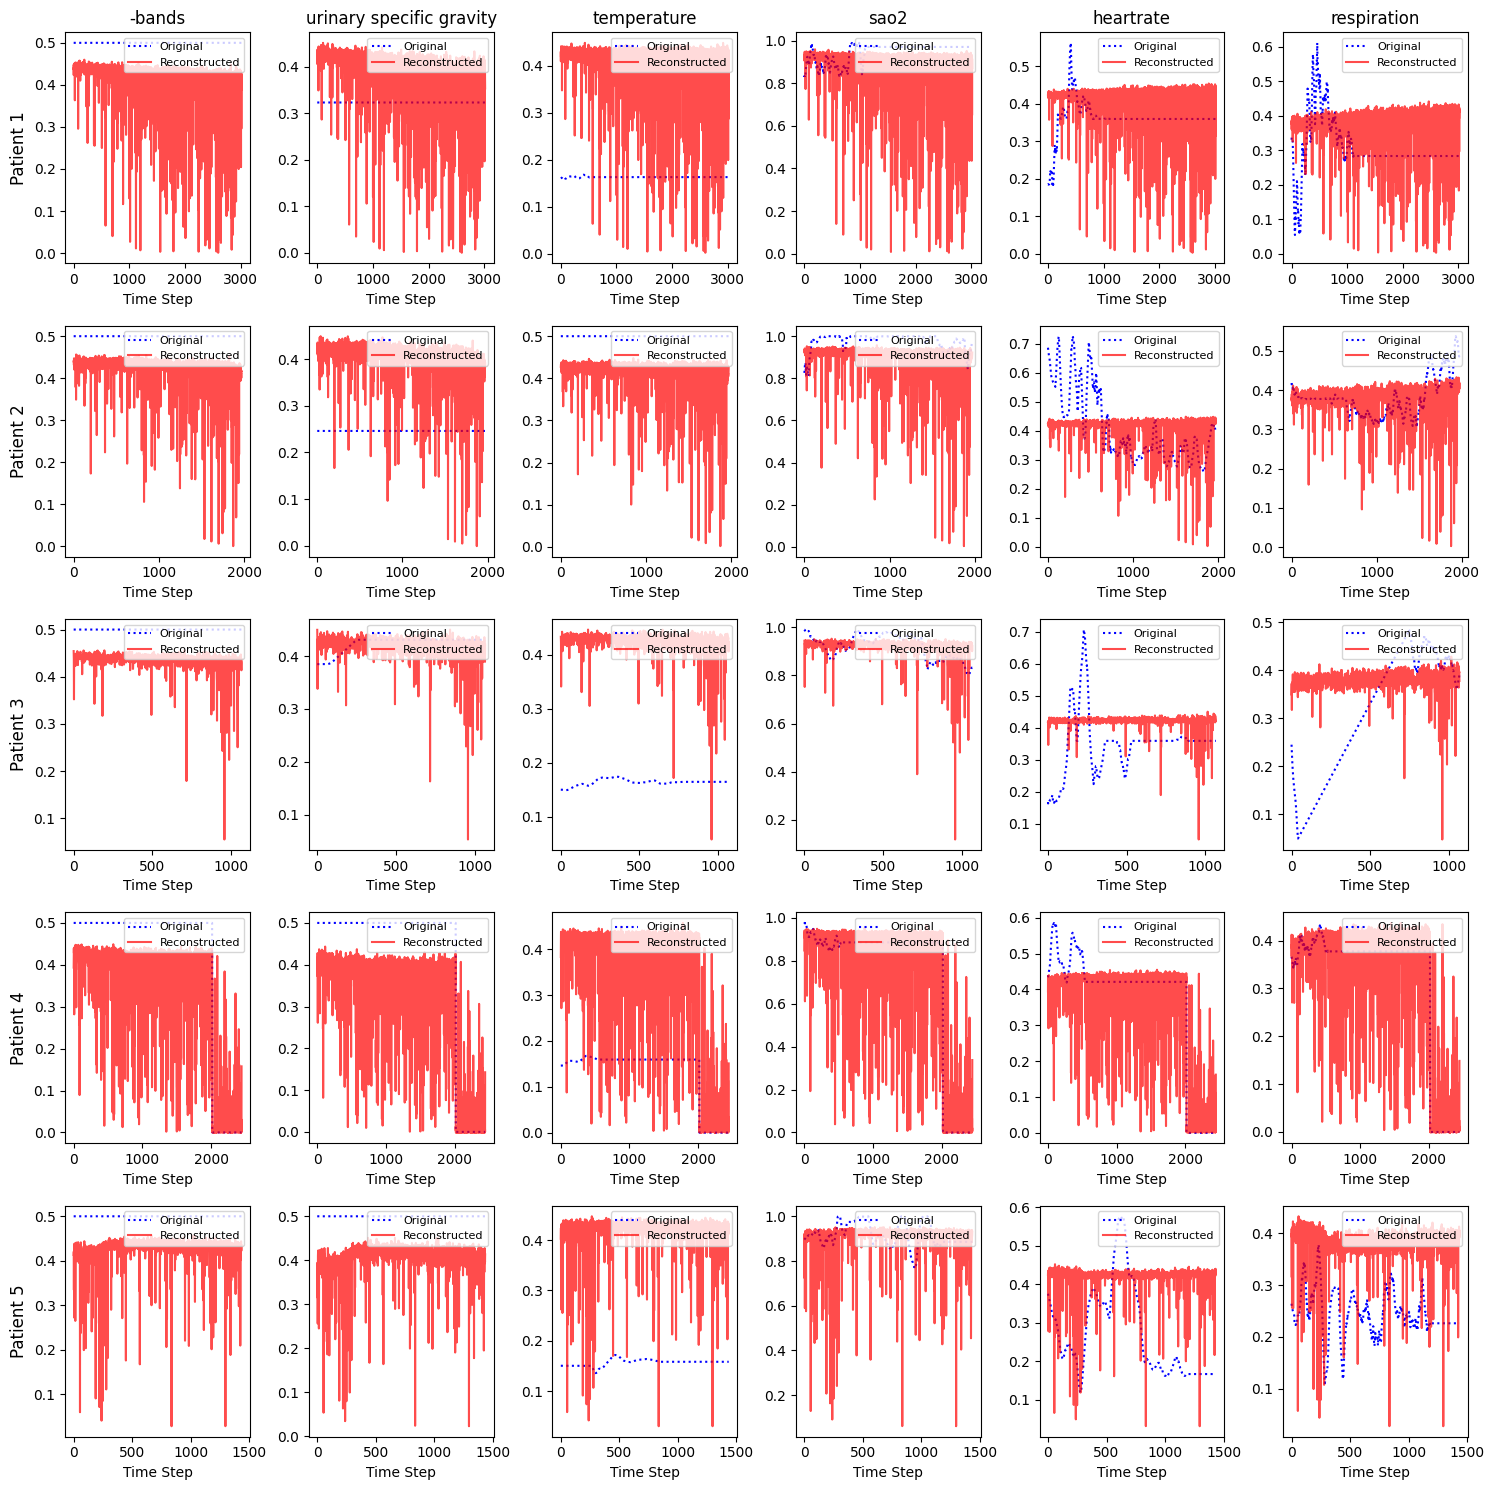

: 

In [ ]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)